In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 2.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ed0e796a450d41fc47e966b582d7377a8fafe98d4342993cfcc23bf38a7b04a0
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uni

In [2]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ISLP.models import ModelSpec as MS
from ISLP import load_data
from lifelines import \
(KaplanMeierFitter,
CoxPHFitter)
from lifelines.statistics import \
(logrank_test,
multivariate_logrank_test)
from ISLP.survival import sim_time

# 11.9 Applied Exercises

## Question - 10. This exercise focuses on the brain tumor data, which is included in the ISLP library.

### (a) Plot the Kaplan-Meier survival curve with ±1 standard error bands, using the KaplanMeierFitter() estimator in the lifelines package.

In [ ]:
BrainCancer = load_data('BrainCancer')
BrainCancer.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


<Axes: title={'center': 'KaplanMeierFitter'}, xlabel='timeline'>

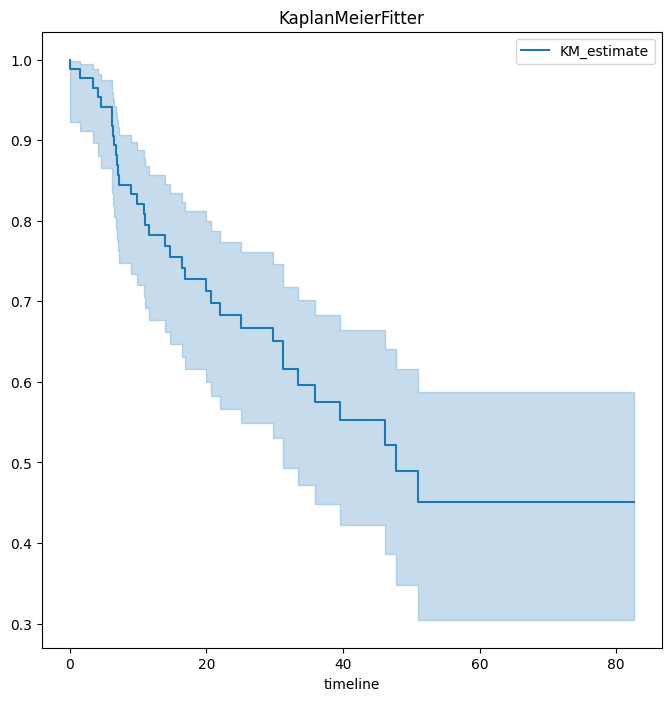

In [ ]:
fig, ax = subplots(figsize = (8,8))
km = KaplanMeierFitter()
km_brain = km.fit(BrainCancer['time'], BrainCancer['status'])
km_brain.plot(ax =ax, title = 'KaplanMeierFitter')

### (b) Draw a bootstrap sample of size n = 88 from the pairs $(y_i, δ_i)$, and compute the resulting Kaplan-Meier survival curve. Repeat this process $B = 200$ times. Use the results to obtain an estimate of the standard error of the Kaplan-Meier survival curve at each timepoint. Compare this to the standard errors obtained in (a).

In [ ]:
BrainCancer.shape

(88, 8)

In [ ]:
np.random.seed(1)
random_num = np.random.randint(0,88, size = 88)
random_num


array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1, 76, 71,  6, 25, 50, 20, 18,
       84, 11, 28, 29, 14, 50, 68, 87, 87, 86, 13,  9,  7, 63, 61, 22, 57,
        1,  0, 60, 81,  8, 13, 47, 72, 30, 71,  3, 70, 21, 49, 57,  3, 68,
       24, 43, 76, 26, 52, 80, 41, 82, 15, 64, 68, 25, 87,  7, 26, 25, 22,
        9, 67, 23, 27, 37, 57, 83, 38,  8, 32, 34, 10, 23, 15, 87, 25, 71,
       74, 62, 46])

In [ ]:
random_df = BrainCancer.iloc[random_num]
random_df

,sex,diagnosis,loc,ki,gtv,stereo,status,time
37,Male,HG glioma,Supratentorial,90,9.95,SRT,1,6.23
12,Female,Meningioma,Infratentorial,90,0.63,SRS,0,32.98
72,Male,LG glioma,Supratentorial,90,2.64,SRT,0,20.13
9,Male,HG glioma,Supratentorial,100,2.53,SRT,0,11.48
75,Female,Meningioma,Supratentorial,80,31.74,SRT,0,57.25
...,...,...,...,...,...,...,...,...
25,Male,LG glioma,Supratentorial,90,4.23,SRT,1,25.02
71,Male,Meningioma,Supratentorial,80,20.93,SRT,1,31.15
74,Male,Other,Supratentorial,100,24.91,SRT,0,19.74
62,Female,HG glioma,Supratentorial,40,22.87,SRT,1,3.38


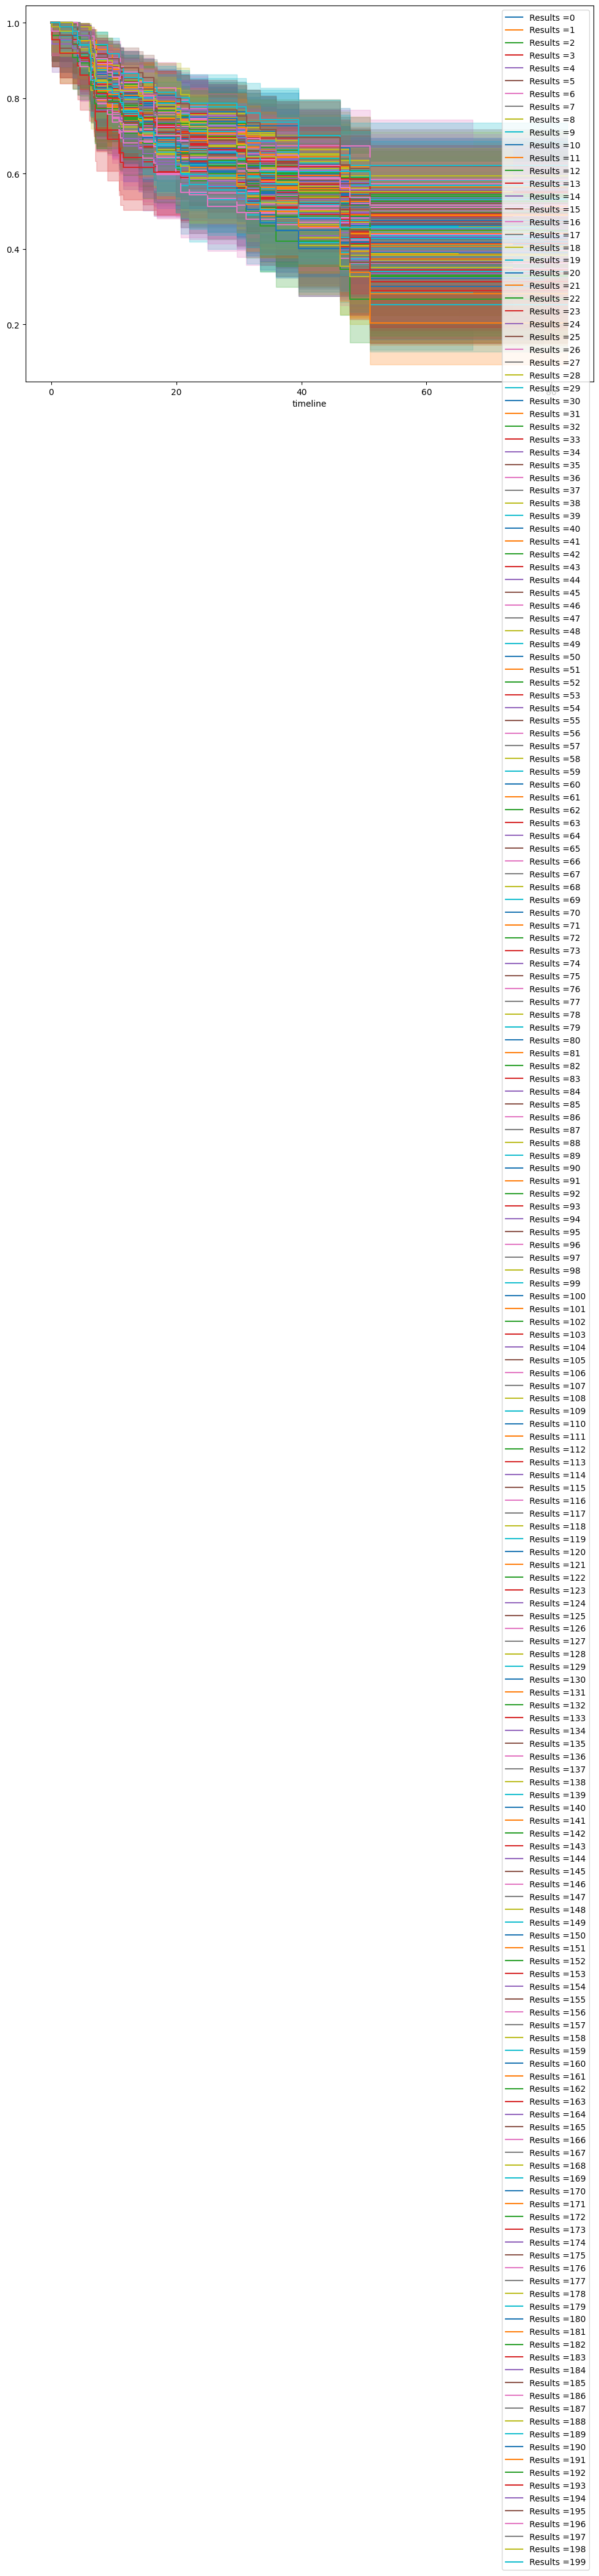

In [ ]:
fig, ax = subplots(figsize = (12,8))
curves = []
for b in range(200):
  random_num = np.random.randint(0,88, size = 88)
  random_df = BrainCancer.iloc[random_num]
  km = KaplanMeierFitter()
  km_brain = km.fit(random_df['time'], random_df['status'])
  curves.append(km_brain)
  km_brain.plot(ax = ax, label = "Results =%d" % b)


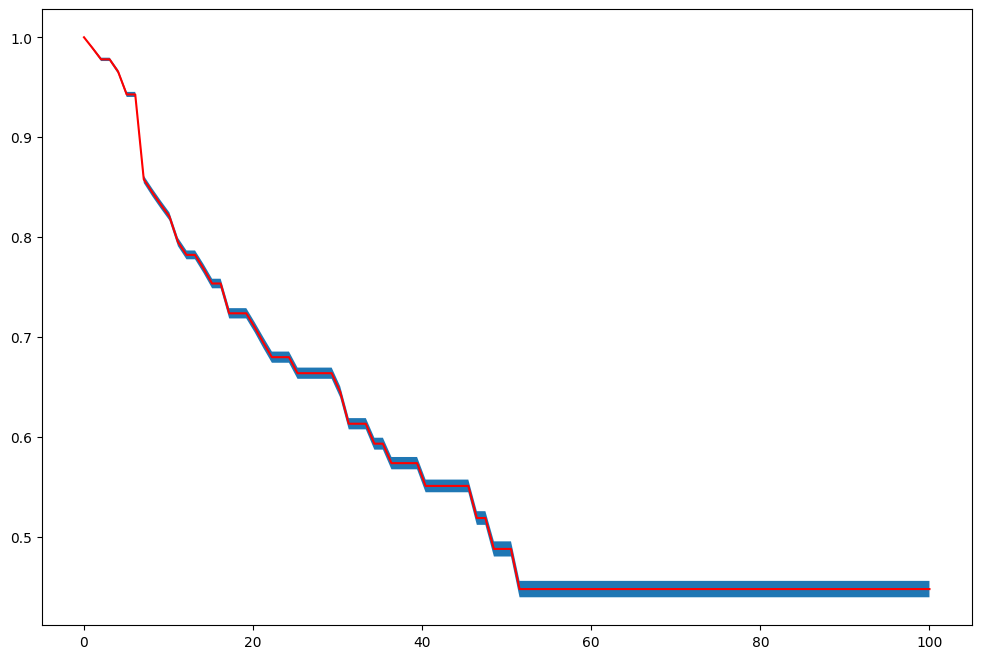

In [ ]:
time_points = np.linspace(0,100, 100)
survival_function = np.array([kmf.survival_function_at_times(time_points) for kmf in curves])
survival_function_mean = survival_function.mean(axis = 0)
survival_function_std = survival_function.std(axis = 0)
plt.figure(figsize = (12,8))
plt.plot(time_points, survival_function_mean, label = 'Mean', color = 'red')
Standard_error = survival_function_std/np.sqrt(88)
plt.fill_between(time_points, survival_function_mean + Standard_error, survival_function_mean - Standard_error)

In [ ]:

km = KaplanMeierFitter()
km_brain = km.fit(BrainCancer['time'], BrainCancer['status'])
survival_function_a = km_brain.survival_function_
confidence_intervals_a = km_brain.confidence_interval_
confidence_intervals_a

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.00,1.000000,1.000000
0.07,0.922070,0.998391
1.18,0.922070,0.998391
1.41,0.911675,0.994234
1.54,0.911675,0.994234
...,...,...
65.02,0.304809,0.587376
67.38,0.304809,0.587376
73.74,0.304809,0.587376
78.75,0.304809,0.587376


In [ ]:
standard_error = (confidence_intervals_a.iloc[:, 1] - confidence_intervals_a.iloc[:, 0]) / (2 * 1.96)

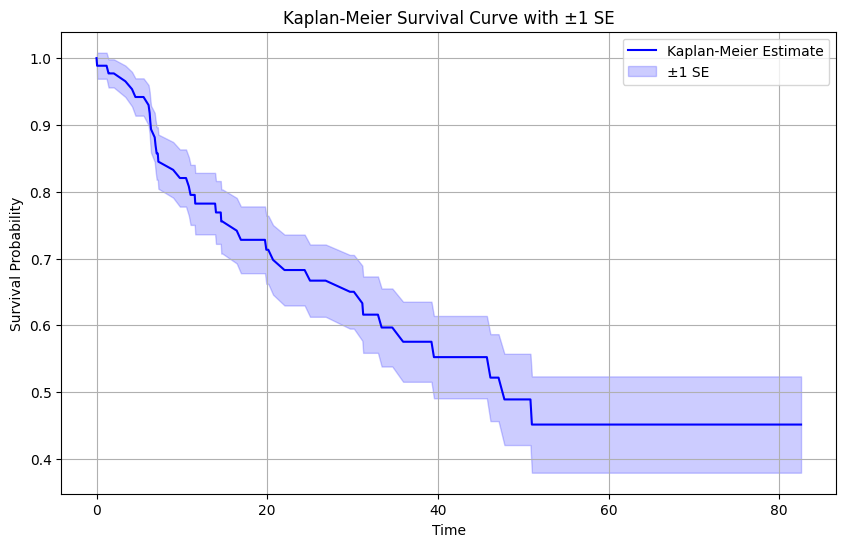

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the Kaplan-Meier survival curve
plt.plot(survival_function_a.index, survival_function_a['KM_estimate'], label='Kaplan-Meier Estimate', color='blue')

# Plot ±1 SE
plt.fill_between(survival_function_a.index,
                 survival_function_a['KM_estimate'] - standard_error,
                 survival_function_a['KM_estimate'] + standard_error,
                 color='blue', alpha=0.2, label='±1 SE')

plt.title('Kaplan-Meier Survival Curve with ±1 SE')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# IT seems the standard error shrunk with the use of several bootstrapping which would be expected.

### (c) Fit a Cox proportional hazards model that uses all of the predictors to predict survival. Summarize the main findings.

In [ ]:
cols = BrainCancer.dropna().columns
cols

Index(['sex', 'diagnosis', 'loc', 'ki', 'gtv', 'stereo', 'status', 'time'], dtype='object')

In [ ]:
all_MS = MS(cols, intercept = False)
all_df = all_MS.fit_transform(BrainCancer.dropna())
cox = CoxPHFitter()
results = cox.fit(all_df, 'time', 'status')
results.summary[['p','se(coef)','coef']]


,p,se(coef),coef
covariate,,,
sex[Male],0.610119,0.360358,0.183748
diagnosis[LG glioma],0.032455,0.579555,-1.239530
diagnosis[Meningioma],0.000002,0.450524,-2.154566
diagnosis[Other],0.039949,0.617672,-1.268870
loc[Supratentorial],0.530665,0.703669,0.441195
ki,0.002693,0.018314,-0.054955
gtv,0.124661,0.022333,0.034293
stereo[SRT],0.767597,0.601578,0.177778


In [ ]:
#Looks like rows 1,2,3,5 are all significant based on having a p value below 0.05.
adjusted = ['diagnosis[LG glioma]', 'diagnosis[Meningioma]', 'diagnosis[Other]']

### (d) Stratify the data by the value of $k_i$. (Since only one observation has $k_i==40$, you can group that observation together with the observations that have $k_i ==60$.) Plot Kaplan-Meier survival curves for each of the five strata, adjusted for the other predictors.

In [ ]:
BrainCancer['ki'].value_counts()

,count
ki,
80,36
90,27
70,14
100,5
60,5
40,1


In [ ]:
BrainCancer['ki'] = BrainCancer['ki'].replace(40,60)
BrainCancer['ki'].value_counts()

,count
ki,
80,36
90,27
70,14
60,6
100,5


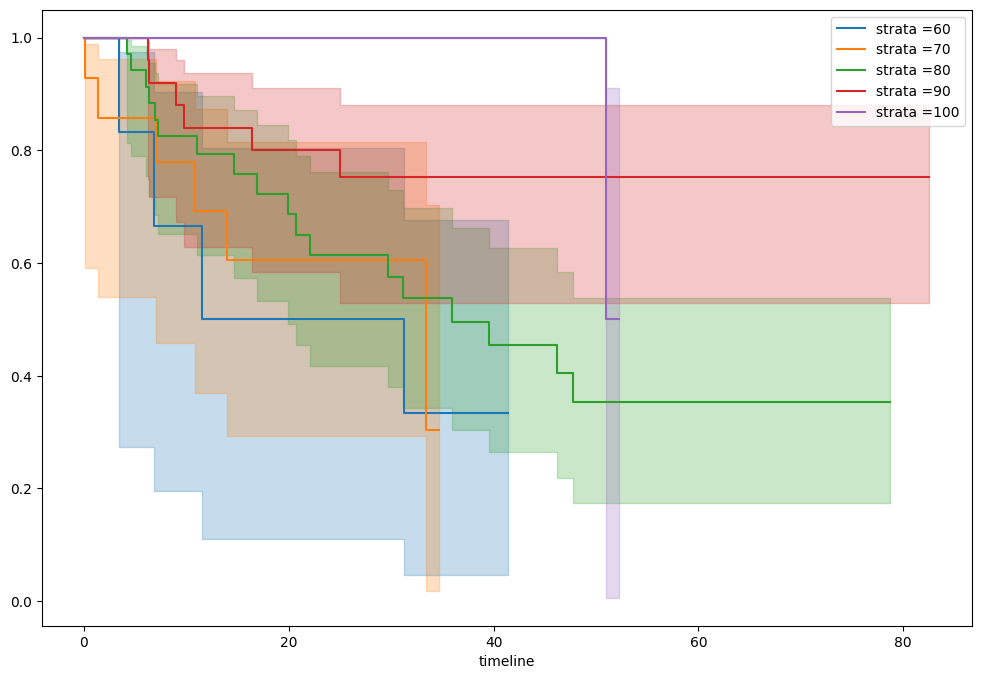

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = subplots(figsize = (12,8))
for strata in [60,70,80,90,100]:
  strata_df = BrainCancer[BrainCancer['ki'] == strata]
  new = kmf.fit(strata_df['time'], strata_df['status'])
  new.plot(ax = ax, label = "strata =%d" % strata)


In [ ]:
"""
kmf = KaplanMeierFitter()

fig, ax = subplots(figsize = (12,8))
for strata in [60,70,80,90,100]:
  strata_df = BrainCancer[BrainCancer['ki'] == strata]
  print(strata_df)

  average_values = strata_df.mean()
  survival_function = cox.predict_survival_function(pd.DataFrame([average_values], columns=BrainCancer.columns))
  plt.plot(survival_function.index, survival_function.values, label=f'Adjusted for Stratum {strata}')
"""

"\nkmf = KaplanMeierFitter()\n\nfig, ax = subplots(figsize = (12,8))\nfor strata in [60,70,80,90,100]:\n  strata_df = BrainCancer[BrainCancer['ki'] == strata]\n  print(strata_df)\n\n  average_values = strata_df.mean()\n  survival_function = cox.predict_survival_function(pd.DataFrame([average_values], columns=BrainCancer.columns))\n  plt.plot(survival_function.index, survival_function.values, label=f'Adjusted for Stratum {strata}')\n"

## Question 11

### (a) Create two groups of observations. In Group 1, X < 2, whereas in Group 2, X ≥ 2. Plot the Kaplan-Meier survival curves corresponding to the two groups. Be sure to label the curves so that it is clear which curve corresponds to which group. By eye does there appear to be a difference between the two groups’ survival curves?

In [3]:
data = {
    'Y': [26.5, 37.2, 57.3, 90.8, 20.2, 89.8],
    'Censor': [1, 1, 1, 0, 0, 0],
    'X': [0.1, 11, -0.3, 2.8, 1.8, 0.4]
}

df = pd.DataFrame(data)

In [5]:
grp1 = df[df['X'] < 2]
grp2 = df[df['X']>= 2]
grp1, grp2

(      Y  Censor    X
 0  26.5       1  0.1
 2  57.3       1 -0.3
 4  20.2       0  1.8
 5  89.8       0  0.4,
       Y  Censor     X
 1  37.2       1  11.0
 3  90.8       0   2.8)

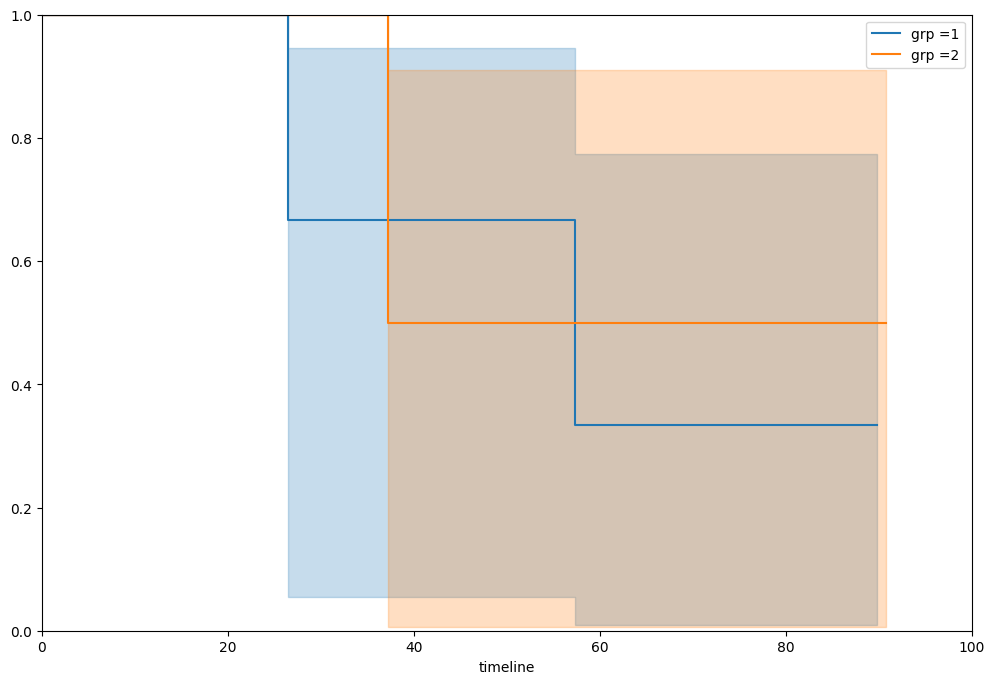

In [12]:
fig, ax = subplots(figsize = (12,8))
ax.set_xlim(0,100)
ax.set_ylim(0,1)
for idx, grp in enumerate([grp1, grp2]):
  kmf = KaplanMeierFitter()
  kmf_fit = kmf.fit(grp['Y'], grp['Censor'])
  kmf_fit.plot(ax = ax, label = 'grp =%d' % (idx+ 1))

In [8]:
# There seems to be a higher chance of survival by 0.20 if you are in group 2 compared to group 1.

### (b) Fit Cox’s proportional hazards model, using the group indicator as a covariate. What is the estimated coefficient? Write a sentence providing the interpretation of this coefficient, in terms of the hazard or the instantaneous probability of the event. Is there evidence that the true coefficient value is non-zero?

In [22]:
cox = CoxPHFitter()
grp1['X'] = 0
grp2['X'] = 1
df_ = pd.concat([grp1, grp2], ignore_index = True)
results = cox.fit(df_, 'Y', 'Censor');
print(results.summary[['p','se(coef)','coef']]);


                  p  se(coef)      coef
covariate                              
X          0.783144  1.235876 -0.340143


<ipython-input-22-487f9272bc45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp1['X'] = 0
<ipython-input-22-487f9272bc45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp2['X'] = 1


In [23]:
# The estimated coefficient is -0.34
# e^-0.34 = 0.771 which implies there is more hazard risk in being in group 1. This checks out based on our graph in (b)
# The p-value is rather high so there is not sufficient evidence to deny the null hypothesis

### (c) Recall from Section 11.5.2 that in the case of a single binary covariate, the log-rank test statistic should be identical to the score statistic for the Cox model. Conduct a log-rank test to determine whether there is a difference between the survival curves for the two groups. How does the p-value for the log-rank test statistic compare to the p-value for the score statistic for the Cox model from (b)?

In [17]:
logrank_test(grp1['Y'], grp2['Y'], grp1['Censor'], grp2['Censor'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

In [21]:
# They have the exact same P value as we would expect